# Practica 3: Machine Learning

## Index
1. [Introducció](#introducció)
2. [Anàlisi de les dades](#anàlisi-de-les-dades)
    - [Comprensió de les variables](#comprensió-de-les-variables)
    - [Anàlisi de la distribució de la variable objectiu](#anàlisi-de-la-distribució-de-la-variable-objectiu)
    - [Gestió de valors nuls](#gestió-de-valors-nuls)
    - [Anàlisi de variables numèriques](#anàlisi-de-variables-numèriques)
    - [Anàlisi de variables categòriques](#anàlisi-de-variables-categòriques)
    - [Relació amb la variable objectiu](#relació-amb-la-variable-objectiu)
    - [Identificació de tendències i patrons](#identificació-de-tendències-i-patrons)
3. [Entrenament i resultats per a cada model](#entrenament-i-resultats)
   - [Perceptró](#perceptró)
   - [Regressió logística](#regressió-logística)
   - [Màquines de vectors de suport (SVM)](#màquines-de-vectors-de-suport-svm)
   - [Arbres de decisió](#arbres-de-decisions)
   - [Boscos aleatoris](#boscos-aleatoris)
4. [Discussió de resultats](#discussió-de-resultats)

# 1. Introducció
En aquesta pràctica, aplicarem diverses tècniques d'aprenentatge automàtic per resoldre un problema de classificació utilitzant el conjunt de dades **Forest Cover Type Dataset**. Aquest conjunt de dades recull informació detallada sobre el sòl i la vegetació del **Bosc Nacional de Roosevelt**, situat als Estats Units, i inclou més de mig milió de mostres descrites per 54 atributs, com ara l'altitud, la inclinació del terreny, el tipus de sòl i el tipus d'ombra, entre altres característiques.

L'objectiu principal de la pràctica és desenvolupar models d'aprenentatge automàtic capaços de predir amb alta precisió el tipus de coberta forestal associat a cada mostra. Aquest és un problema de classificació multiclasse amb 7 categories diferents, les quals representen tipus específics de vegetació en el bosc.

Per aconseguir aquest objectiu, es farà ús de diverses tècniques d'anàlisi de dades i entrenament de models, incloent la selecció de característiques, l'ajust d'hiperparàmetres, l'entrenament i la validació dels models, així com l'anàlisi dels resultats obtinguts. A més, compararem diferents algorismes de classificació per determinar quin ofereix els millors resultats per a aquest conjunt de dades.


# 2. Anàlisi de les dades
Primerament, importarem les llibreries i dades necessaries per la preparació de les dades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Seguidament llegirem les dades del conjunt de dades de Forest Cover Type Dataset proporcionada utilitzant la llibreria **Pandas**. Mostrant les primeres dades, assegurant-nos de que es mostrin totes les columnes.

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


En una primera vista, sembla que el conjunt de dades està complet i es pot emprar directament. A continuació, explorarem més a fons les característiques de les dades per a entendre millor la seva estructura i contingut.
### 2.1. Comprensió de les variables

#### Variables Numèriques
- **Elevation**
- **Aspect**
- **Slope**
- **Horizontal_Distance_To_Hydrology**
- **Vertical_Distance_To_Hydrology**
- **Horizontal_Distance_To_Roadways**
- **Hillshade_9am**
- **Hillshade_Noon**
- **Hillshade_3pm**
- **Horizontal_Distance_To_Fire_Points**

#### Variables Categòriques
- **Wilderness_Area1** a **Wilderness_Area4**: Variables binàries que indiquen presència en àrees específiques.
- **Soil_Type1** a **Soil_Type40**: Variables binàries que indiquen tipus de sòl.

#### Variable Objectiu
- **Cover_Type**: Una variable categòrica amb valors entre 1 i 7 (probablement representant diferents tipus de cobertura de terreny).

### 2.2. Anàlisi de la distribució de la variable objectiu
Per entendre millor la distribució de la variable objectiu, **Cover_Type**, analitzarem la quantitat de mostres per a cada categoria.

Distribució de Cover_Type:
Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


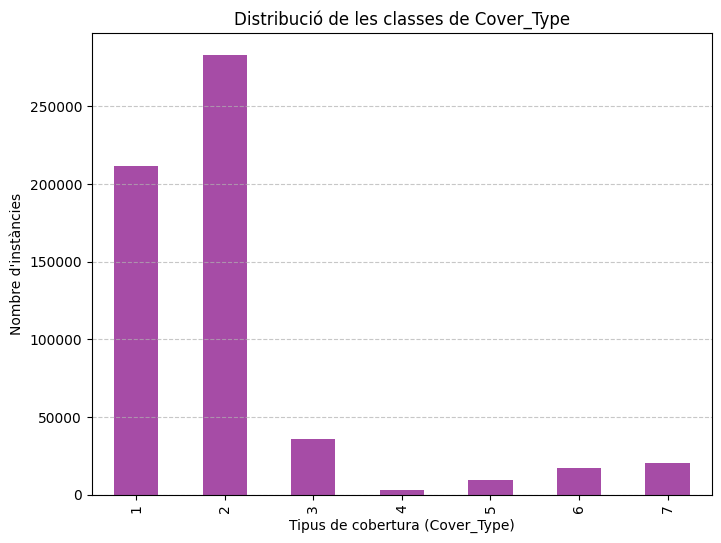

In [3]:
# Analitzar la distribució de la variable Cover_Type
cover_type_counts = df['Cover_Type'].value_counts().sort_index()

# Mostrar distribució
print("Distribució de Cover_Type:")
print(cover_type_counts)

# Visualització
plt.figure(figsize=(8, 6))
cover_type_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribució de les classes de Cover_Type')
plt.xlabel('Tipus de cobertura (Cover_Type)')
plt.ylabel('Nombre d\'instàncies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Es pot veure que les dades tenen una distribució desigual entre les diferents classes de **Cover_Type**. Això podria afectar el rendiment dels models de classificació, ja que alguns tipus de cobertura podrien tenir més mostres que d'altres. Això es veurà més endavant en l'entrenament dels models, com alguns que empren tècniques per a equilibrar les classes, tindran un millor resultat.

### 2.3 Gestió de valors nuls
Comprovarem si hi ha valors nuls en el conjunt de dades i, si és així, els gestionarem adequadament eliminant les files.


In [4]:
# Comprovar valors nuls
null_values = df.isnull().sum()
print("Valors nuls per columna:\n" + str(null_values))

# Eliminar files amb valors nuls
df.dropna(inplace=True)
print("Files amb valors nuls eliminades.")

Valors nuls per columna:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11    

### 2.4. Anàlisi de variables numèriques
Per a les variables numèriques, primerament analitzarem la seva distribució, emprant histogrames per a visualitzar la freqüència de cada característica.

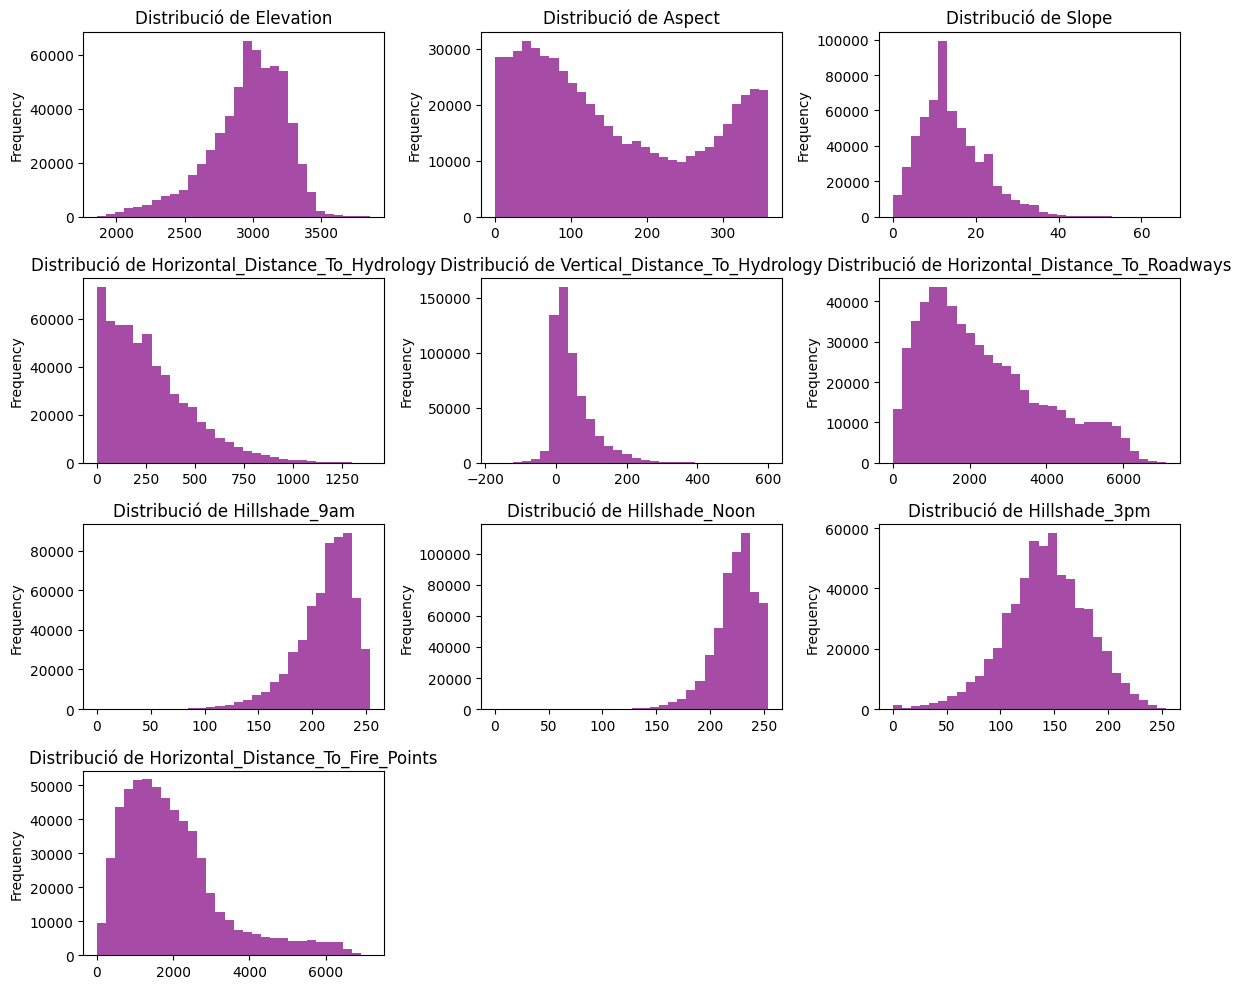

In [5]:
# Seleccionar les variables numèriques
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

# Crear un histograma per cada variable numèrica
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    df[col].plot(kind='hist', bins=30, color='purple', alpha=0.7)
    plt.title(f'Distribució de {col}')

plt.tight_layout()
plt.show()

1. **Elevation**:
   Distribució amb forma de campana, suggerint una distribució normal o gairebé normal.

2. **Aspect**:
   Distribució uniforme, amb valors repartits de manera homogènia en tot el rang.

3. **Slope**:
   Distribució esbiaixada cap a valors baixos, amb una cua cap a la dreta.

4. **Horizontal_Distance_To_Hydrology**:
   Distribució molt esbiaixada cap a valors baixos, amb una cua llarga cap a la dreta.

5. **Vertical_Distance_To_Hydrology**:
   Distribució esbiaixada cap a valors baixos, amb alguns valors negatius i una cua cap a la dreta.

6. **Horizontal_Distance_To_Roadways**:
   Distribució esbiaixada cap a valors baixos, però amb una cua més llarga i extensa.

7. **Hillshade_9am**:
   Distribució unimodal, amb un pic pronunciat cap als valors alts.

8. **Hillshade_Noon**:
   Distribució unimodal amb un pic moderat cap al centre del rang.

9. **Hillshade_3pm**:
   Distribució gairebé simètrica, amb un pic al centre del rang.

10. **Horizontal_Distance_To_Fire_Points**:
    Distribució esbiaixada cap a valors baixos, amb una cua llarga cap a la dreta.

No es poden identificar outliers ni valors anòmals. A continuació, visualitzarem els boxplots per a cada variable numèrica per a identificar possibles outliers.

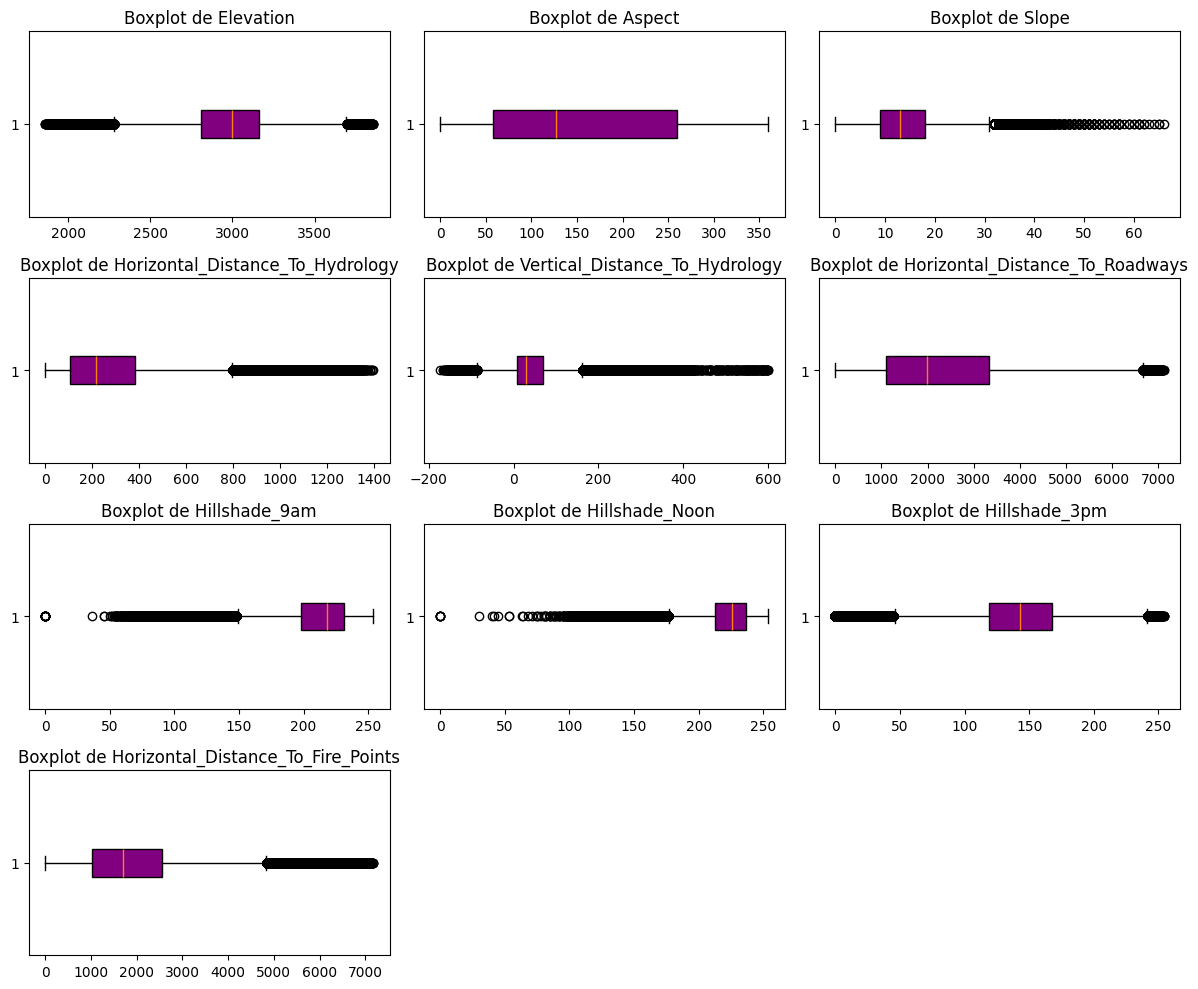

In [6]:
# Boxplot per identificar outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="purple", color="black"))
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Els boxplots mostren que algunes variables podrien contenir outliers, com ara **Vertical_Distance_To_Hydrology** i **Horizontal_Distance_To_Fire_Points**. Aquests outliers podrien afectar negativament el rendiment dels models. Tanmateix, no considerarem la seva eliminació per ara, ja que podrien ser valors vàlids.

A continuació, analitzarem les correlacions entre les variables numèriques per a identificar possibles relacions entre elles, el que podria ser útil per a descartar variables redundants.

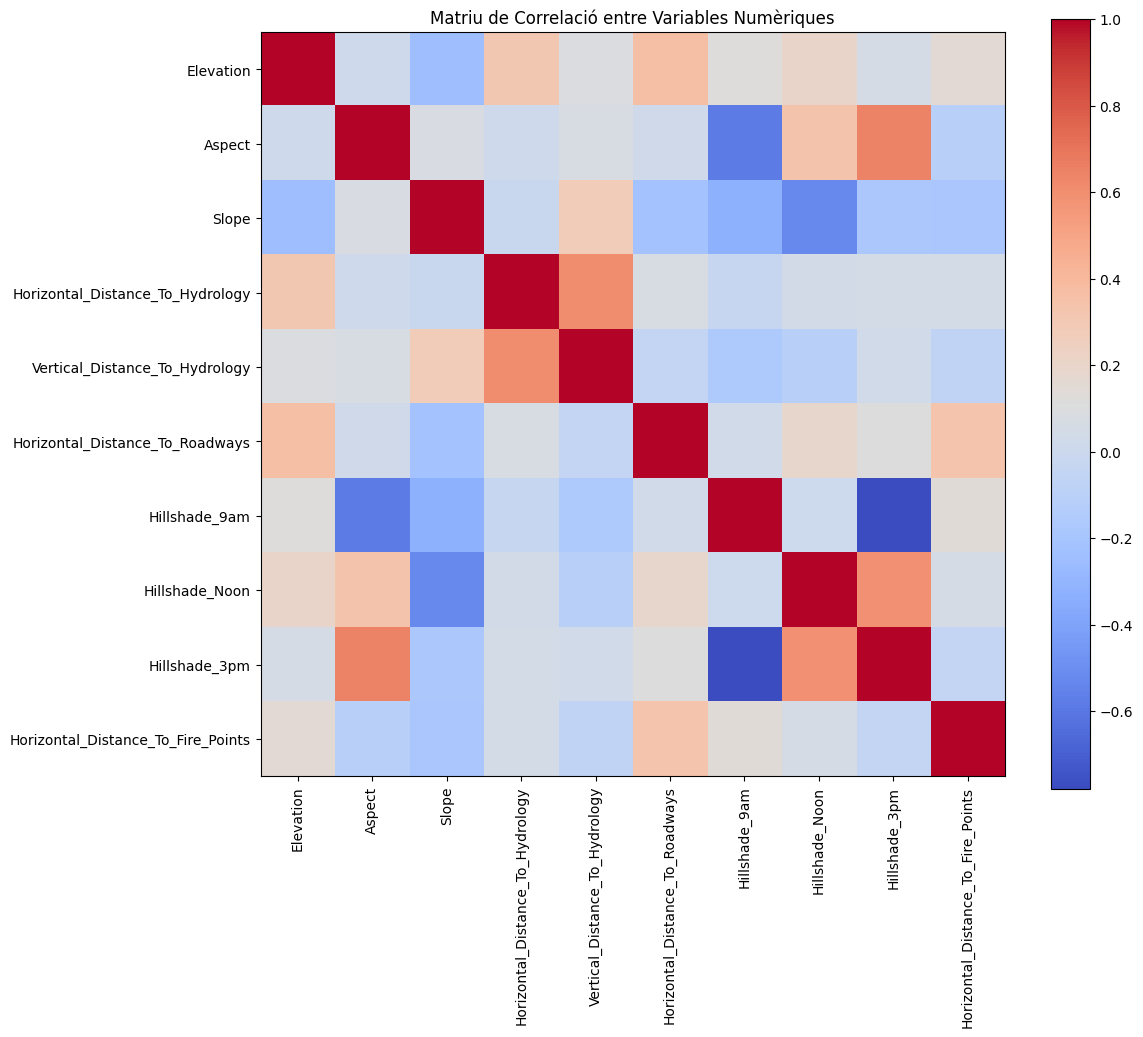

In [7]:
# Matriu de correlació
correlation_matrix = df[numerical_cols].corr()

# Visualitzar la matriu de correlació
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriu de Correlació entre Variables Numèriques')
plt.show()

La matriu de correlació mostra que hi ha algunes correlacions més significatives que altres, com ara entre **Hillshade_9am** i **Hillshade_3pm**, que tenen una correlació negativa. No obstant això, no hi ha correlacions molt altes entre les variables, cosa que podria indicar que cada variable aporta informació única i rellevant per a la classificació. Per això no eliminarem cap variable numèrica en aquest punt.

### 2.5. Anàlisi de variables categòriques
Per a les variables categòriques, analitzarem la seva distribució, cercant si hi ha variables amb valors constants o amb valors que només apareixen en un petit nombre de mostres, ja que això podria indicar que no són informatives per a la classificació, i per tant podrien ser eliminades. Aquestes variables categories són **Wilderness_Area1** a **Wilderness_Area4** i **Soil_Type1** a **Soil_Type40**, que ja han estat codificades com a variables binàries mitjançant codificació one-hot.

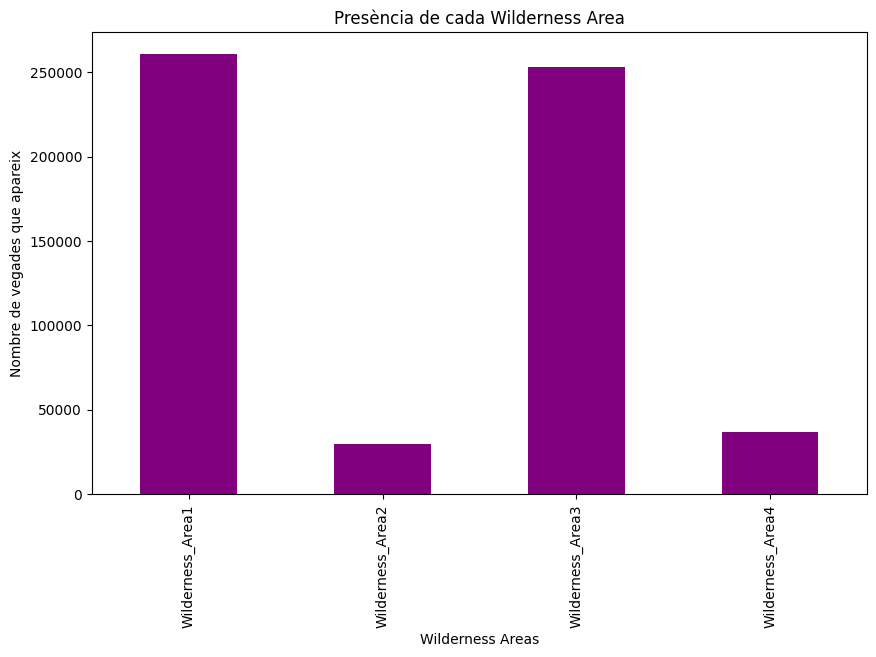

In [8]:
# Distribució de les àrees de bosc
wilderness_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
wilderness_data = df[wilderness_columns].sum()

# Visualitzar la presència de cada Wilderness_Area
plt.figure(figsize=(10, 6))
wilderness_data.plot(kind='bar', color='purple')
plt.xlabel("Wilderness Areas")
plt.ylabel("Nombre de vegades que apareix")
plt.title("Presència de cada Wilderness Area")
plt.show()

Veiem que totes les àrees de bosc tenen mostres en el conjunt de dades, per tant, totes aporten informació i no eliminarem cap.

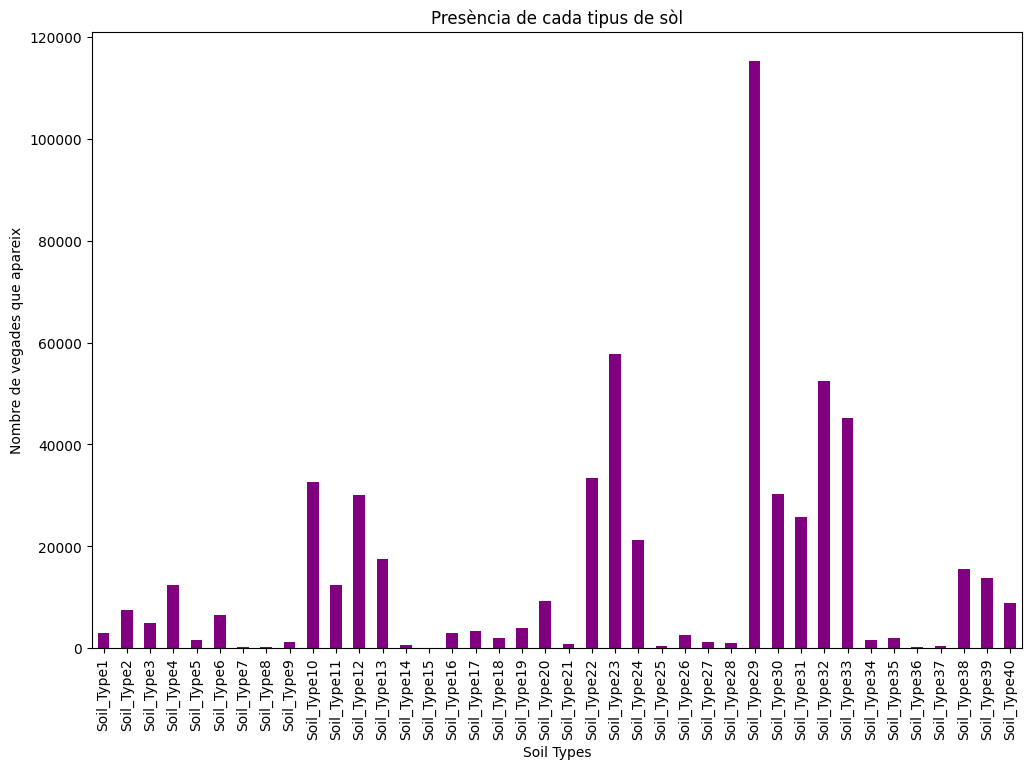

In [9]:
# Distribució dels tipus de sòl
soil_columns = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
                'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
                'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
soil_data = df[soil_columns].sum()

# Visualitzar la presència de cada tipus de sòl
plt.figure(figsize=(12, 8))
soil_data.plot(kind='bar', color='purple')
plt.xlabel("Soil Types")
plt.ylabel("Nombre de vegades que apareix")
plt.title("Presència de cada tipus de sòl")
plt.show()

Veiem que hi ha alguns tipus de sòl que tenen una presència molt baixa en el conjunt de dades, cosa que podria indicar que no són informatius per a la classificació. És el cas de **Soil_Type15** que només apareix en un petit nombre de mostres. Aquesta variable podria ser eliminada per simplificar el model sense perdre informació rellevant. N'hi ha altres que també tenen una presència baixa, però no els eliminarem per ara.

In [10]:
# Comptar mostres per Soil_Type15
soil_type15_count = df['Soil_Type15'].sum()

# Eliminar les files on Soil_Type15 és 1
df = df[df['Soil_Type15'] != 1]

# Eliminar la columna 'Soil_Type15' i eliminar de la llista de variables categòriques
df.drop('Soil_Type15', axis=1, inplace=True)
soil_columns.remove('Soil_Type15')

print(f"S'han eliminat {soil_type15_count} mostres amb Soil_Type15")

S'han eliminat 3 mostres amb Soil_Type15


### 2.6. Relació amb la variable objectiu
Per a analitzar la realció entre les variables numèriques amb la variable objectiu **Cover_Type**, emprarem gràfics de dispersió per a visualitzar com es distribueixen les mostres de cada classe en funció de les variables numèriques. Cerquem identificar si hi ha alguna relació clara entre les variables i la classe de cobertura forestal.

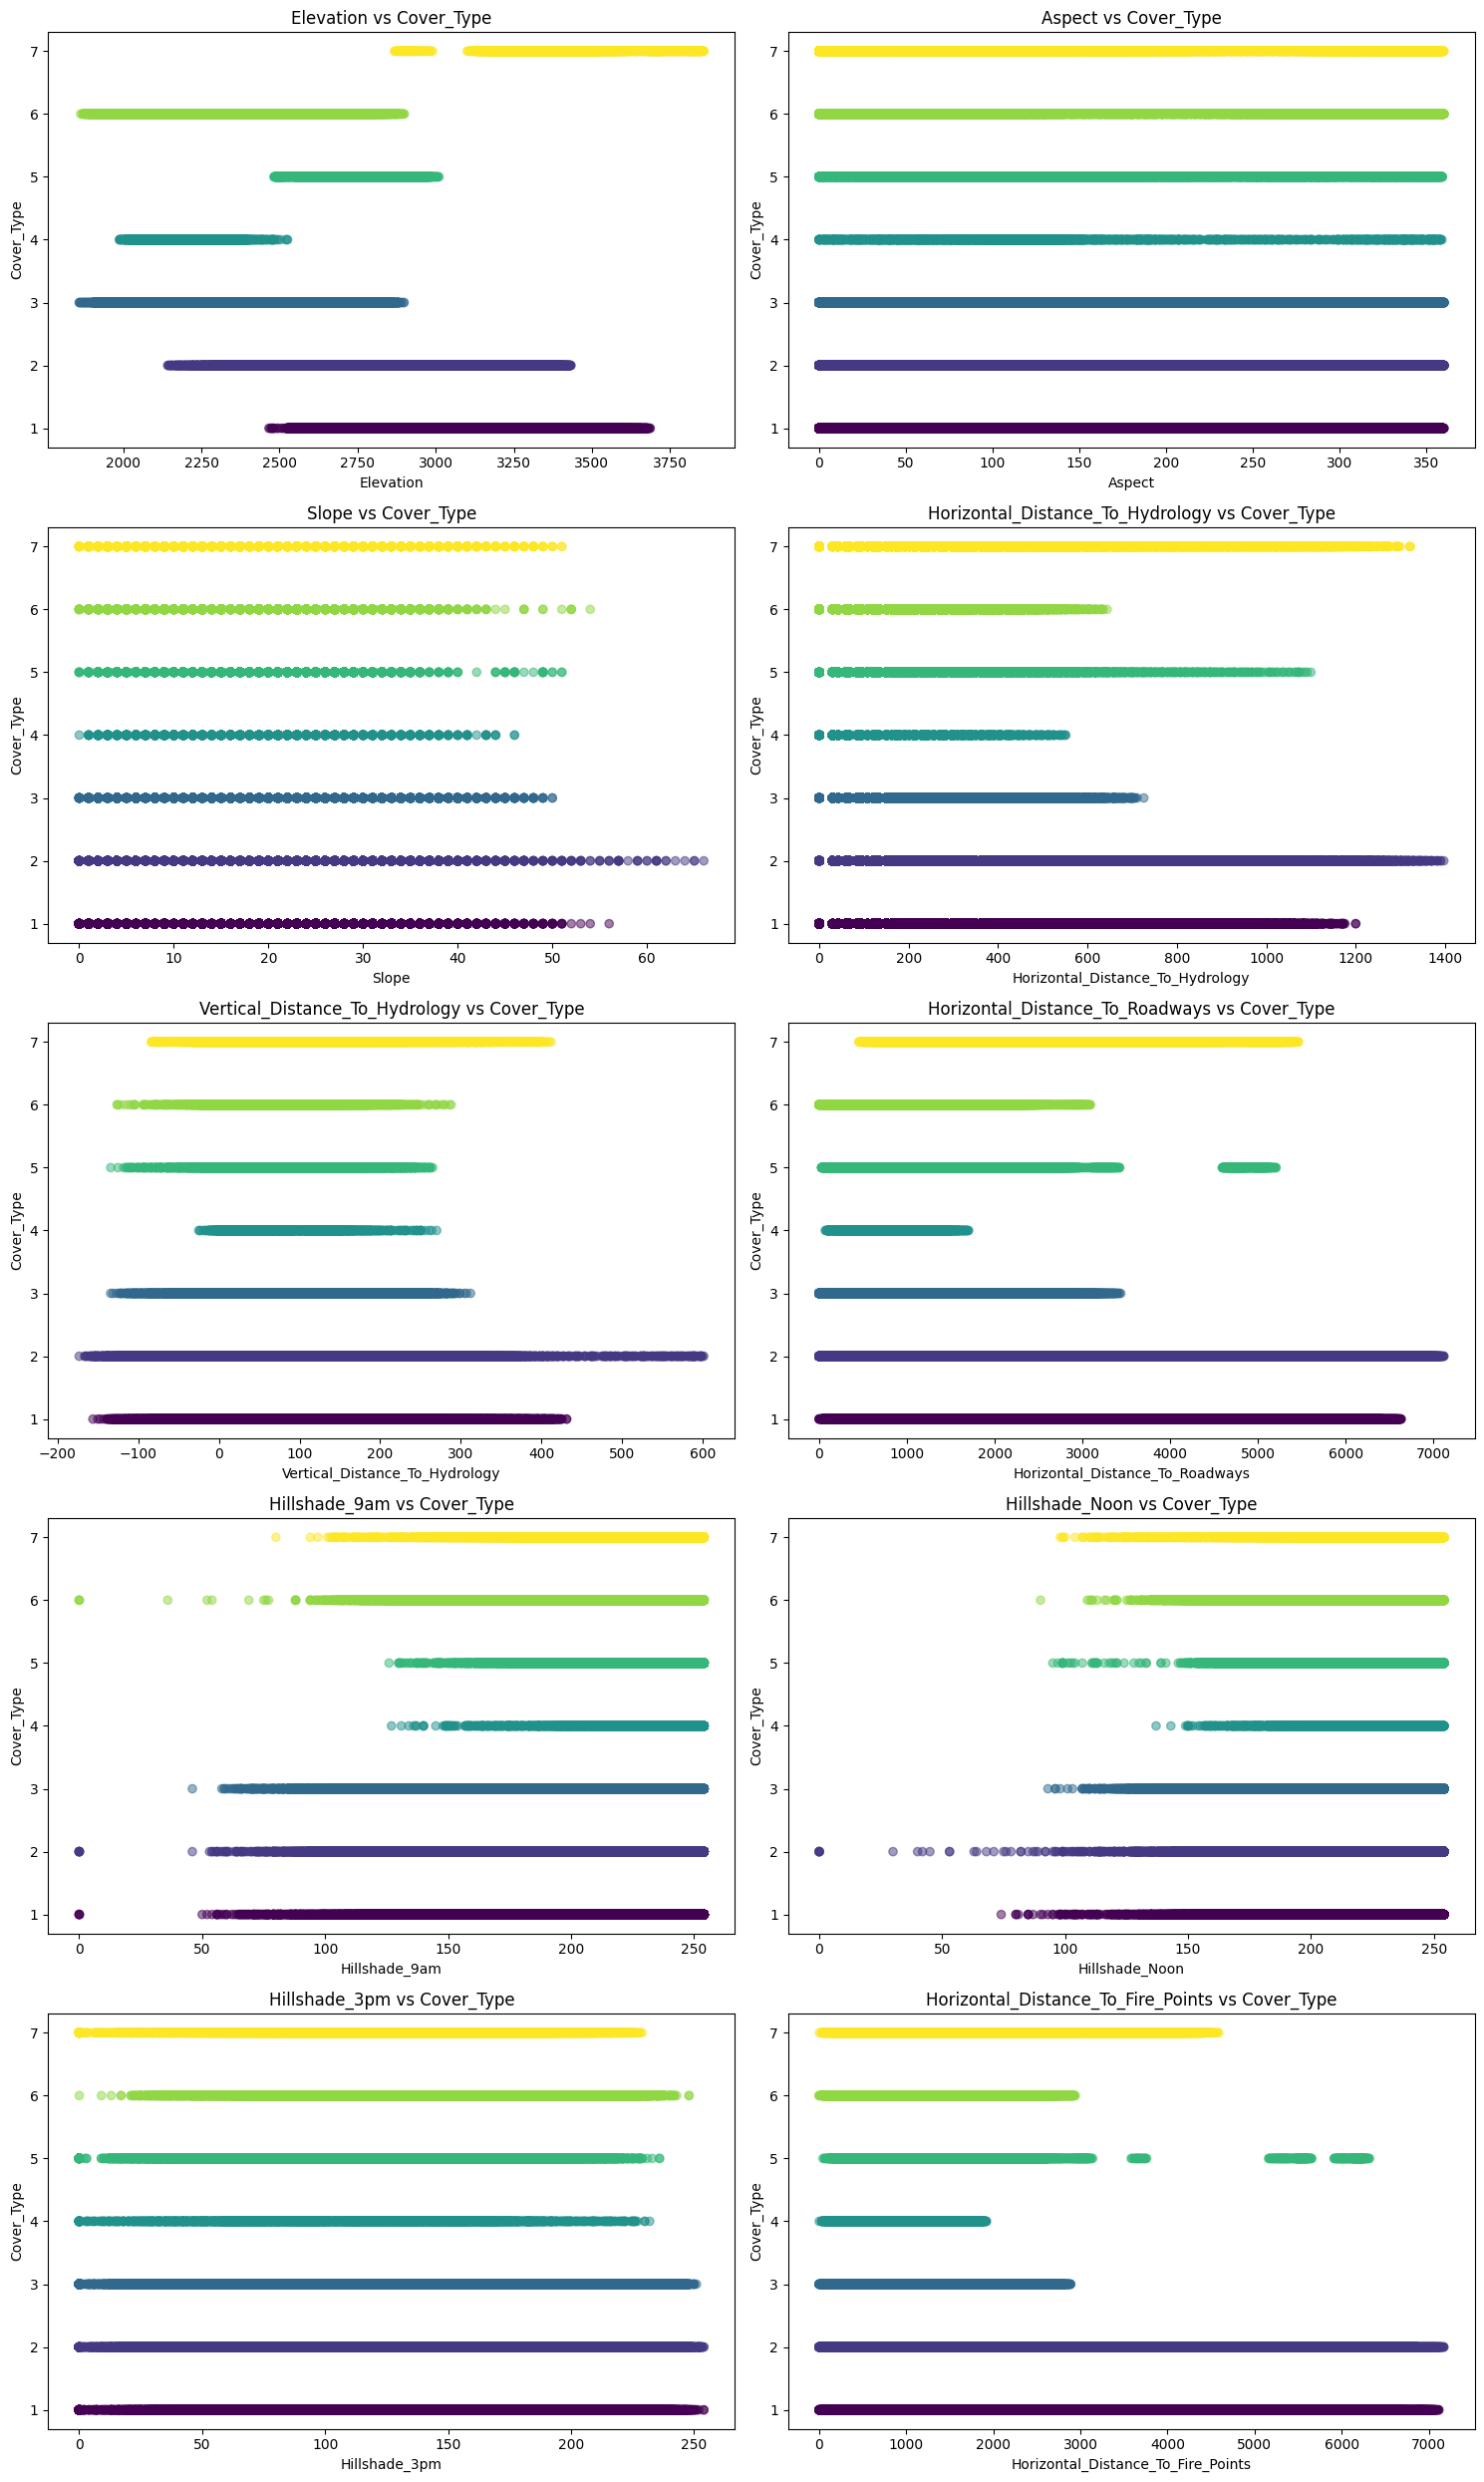

In [11]:
# Determinar la quantitat de files i columnes per als subgràfics
n = len(numerical_cols)
n_cols = 2
n_rows = int(np.ceil(n / n_cols))

# Crear una figura amb subgràfics
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Convertir axes a una llista unidimensional en cas que sigui 2D
axes = axes.flatten()

# Crear un gràfic de dispersió per cada variable numèrica
for i, col in enumerate(numerical_cols):
    axes[i].scatter(df[col], df['Cover_Type'], alpha=0.5, c=df['Cover_Type'], cmap='viridis')
    axes[i].set_title(f'{col} vs Cover_Type')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cover_Type')

# Ajustar l'espai entre subgràfics
plt.tight_layout()
plt.show()


Els gràfics de dispersió mostren que les diferents classes de **Cover_Type** es distribueixen de manera diferent en funció de les variables numèriques. Algunes variables, com **Elevation** i **Horizontal_Distance_To_Roadways**, semblen tenir una relació clara amb la classe de cobertura forestal, mentre que altres, com **Aspect** semblen tenir una distribució més uniforme. Gracies a aquesta anàlisi, podem eliminar aquesta variable que no aporta informació rellevant.

In [12]:
# Eliminar la variable 'Aspect'
df.drop('Aspect', axis=1, inplace=True)
numerical_cols.remove('Aspect')

Per a les variables categòriques, analitzarem la relació amb la variable objectiu **Cover_Type** el càlcul de la mitjana per a cada classe. Adicionalment visualitzarem la relació entre les variables categòriques binàries i la variable objectiu mitjançant un mapa de calor.

Mitjanes de Wilderness_Area per Cover_Type:
            Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
Cover_Type                                                                        
1                   0.499042          0.087779          0.413180          0.000000
2                   0.516048          0.031715          0.441555          0.010681
3                   0.000000          0.000000          0.399955          0.600045
4                   0.000000          0.000000          0.000000          1.000000
5                   0.398293          0.000000          0.601707          0.000000
6                   0.000000          0.000000          0.439185          0.560815
7                   0.248708          0.112335          0.638957          0.000000

Mitjanes de Soil_Type per Cover_Type:
            Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
Cover_Type                                                               
1             0.000000

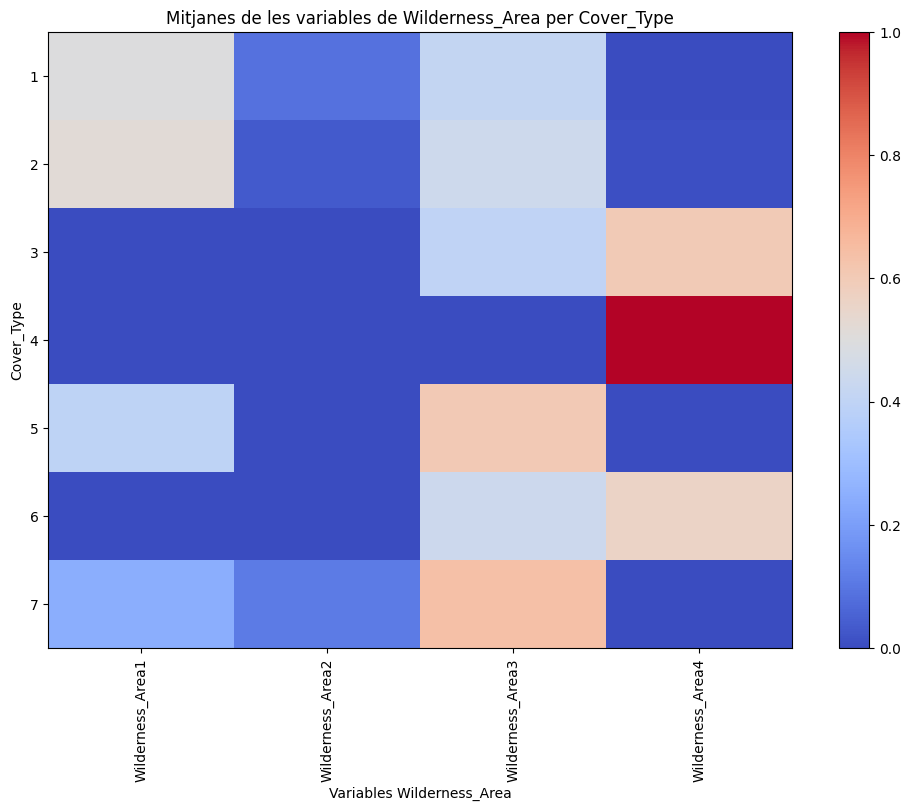

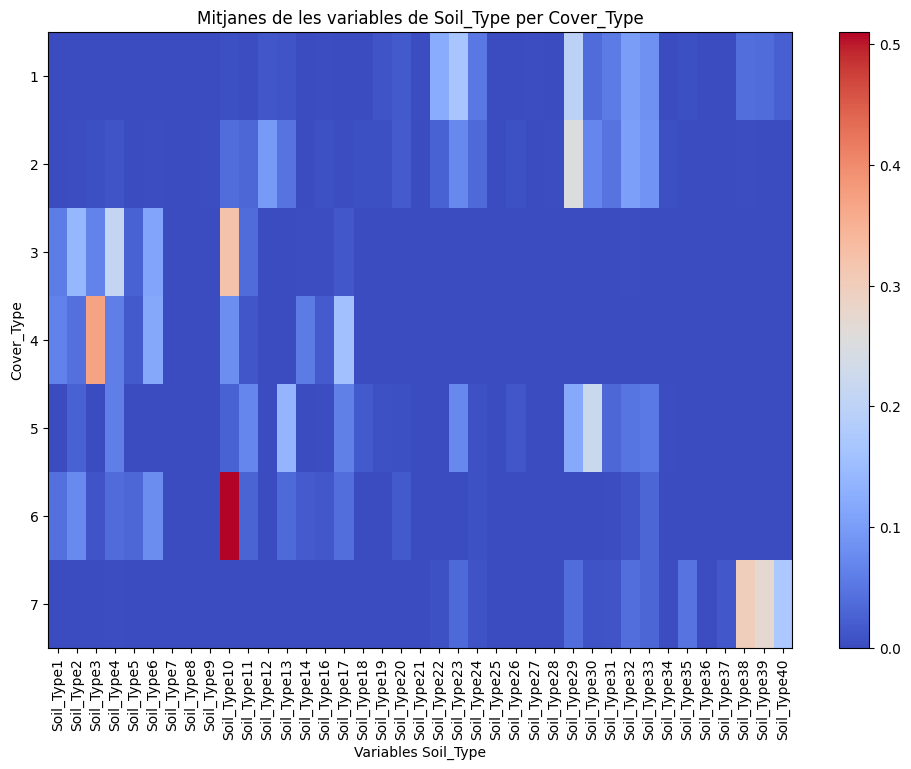

In [13]:
# Agrupar per Cover_Type i calcular la mitjana per cada variable de Wilderness
wilderness_means = df[wilderness_columns + ['Cover_Type']].groupby('Cover_Type').mean()

# Agrupar per Cover_Type i calcular la mitjana per cada variable de Soil
soil_means = df[soil_columns + ['Cover_Type']].groupby('Cover_Type').mean()

# Mostrar els resultats
print("Mitjanes de Wilderness_Area per Cover_Type:")
print(wilderness_means.to_string())
print("\nMitjanes de Soil_Type per Cover_Type:")
print(soil_means)

# Gràfic de calor per visualitzar les mitjanes de les variables de Wilderness_Area
plt.figure(figsize=(12, 8))
plt.imshow(wilderness_means, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.xticks(range(len(wilderness_means.columns)), wilderness_means.columns, rotation=90)
plt.yticks(range(len(wilderness_means.index)), wilderness_means.index)
plt.colorbar()

plt.title('Mitjanes de les variables de Wilderness_Area per Cover_Type')
plt.xlabel('Variables Wilderness_Area')
plt.ylabel('Cover_Type')
plt.show()

# Gràfic de calor per visualitzar les mitjanes de les variables de Soil_Type
plt.figure(figsize=(12, 8))
plt.imshow(soil_means, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.xticks(range(len(soil_means.columns)), soil_means.columns, rotation=90)
plt.yticks(range(len(soil_means.index)), soil_means.index)
plt.colorbar()

plt.title('Mitjanes de les variables de Soil_Type per Cover_Type')
plt.xlabel('Variables Soil_Type')
plt.ylabel('Cover_Type')
plt.show()

Aquests gràfics de calor mostra com les diferents classes de **Cover_Type** tenen valors mitjans diferents per a les variables binàries. Això indica que les variables categòriques són informatives per a la classificació i no eliminarem. A més, ens mostra resultats interessants com que el **Wilderness_Area4** té una relació molt forta amb la classe 4. Com a resultat d'aquesta anàlisi, no eliminarem cap variable categòrica.

### 2.7. Identificació de tendències i patrons
Si veiem que l'eficiència dels models no és la desitjada, considerarem la possibilitat d'aplicar tècniques de selecció de característiques (com ara PCA) per a reduir la dimensionalitat de les dades i millorar el rendiment dels models. Aquesta decisió es prendrà més endavant, després d'entrenar els primers models i avaluar-ne el rendiment.

### 2.8. Divisió de les dades
Finalment, dividirem les dades en conjunts d'entrenament i prova per a l'entrenament dels models. Utilitzarem un 80% de les dades per a l'entrenament i un 20% per a la prova. El conjunt d'entrenament es farà servir per a ajustar els models, mentre que el conjunt de proves es farà servir per a avaluar el seu rendiment. Emprem la funció `train_test_split` de la llibreria **scikit-learn** per a realitzar la divisió, fixant una llavor aleatòria per a garantir la reproducibilitat dels resultats.

In [15]:
# Dividir les dades en conjunts d'entrenament i prova
from sklearn.model_selection import train_test_split

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunt d'entrenament:", X_train.shape, y_train.shape)
print("Conjunt de prova:", X_test.shape, y_test.shape)

Conjunt d'entrenament: (464807, 52) (464807,)
Conjunt de prova: (116202, 52) (116202,)


# 3. Entrenament i resultats per a cada model
